In [18]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score,accuracy_score, precision_score,recall_score


from keras.datasets import cifar10

import warnings
warnings.filterwarnings('ignore')

60000 images total. We have 10,000 testing images and 50,000 images for training. We further split the 50,000 images into 40,000 images for training and 10,000 images for validation

In [3]:
(X_tr, y_tr), (X_te, y_te) = cifar10.load_data()
seed = 1234 # for reproduction
# Concatenate train and test images
X = np.concatenate((X_tr,X_te))
y = np.concatenate((y_tr,y_te))
# Randomization
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=10000, random_state=seed,shuffle=True)
# size of X_tr = (50000,32,32,3) where (32,32) is size of the image and (3) is red,green,and blue channel values.
# we have 50000 datapoints for training set, and each set will have 32*32*3 = 3072 features. we need to reshape for training 
X_tr = X_tr.reshape(50000,3072)
X_te = X_te.reshape(10000,3072)
y_tr = y_tr.reshape(50000)
y_te = y_te.reshape(10000)


In [4]:
# Validation sets
X_val = X_tr[40000:50000]
y_val = y_tr[40000:50000]
# Training sets
X_tr = X_tr[:10000]
y_tr = y_tr[:10000]
print(X_tr.shape)
print(y_tr.shape)

(10000, 3072)
(10000,)


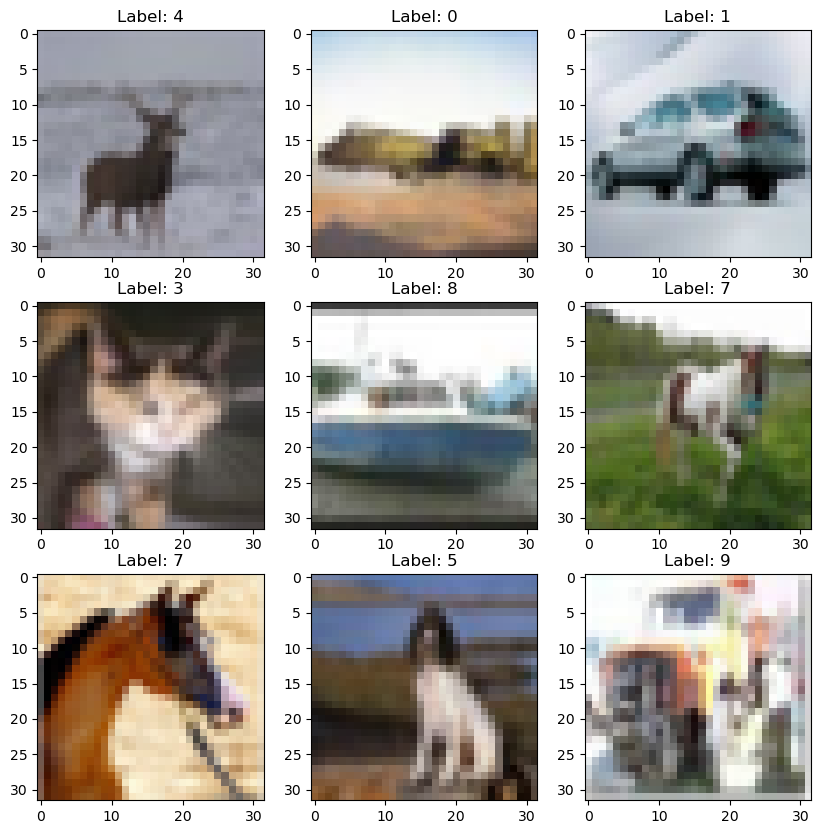

In [5]:
fig, axes = plt.subplots(3, 3, figsize=(10, 10)) 

for i in range(9):
    img = X_tr[i]
    axes[i//3, i%3].imshow(img.reshape(32,32,3)) # to show the image, we have to convert 3072 features back to (32,32,3)
    label = y_tr[i] 
    axes[i//3, i%3].set_title(f'Label: {label}') 

In [8]:
# Reshape fit and transform the data for better results
scaler = StandardScaler()
X_tr = scaler.fit_transform(X_tr)
X_te = scaler.transform(X_te)
#Take smaller size of training set for better runtime
X_tr = X_tr[:5000]
y_tr = y_tr[:5000]

1. KNN Classifier

Accuracy: 0.26790
Precision: 0.37638
Recall: 0.26843
roc_auc_score: 0.71477


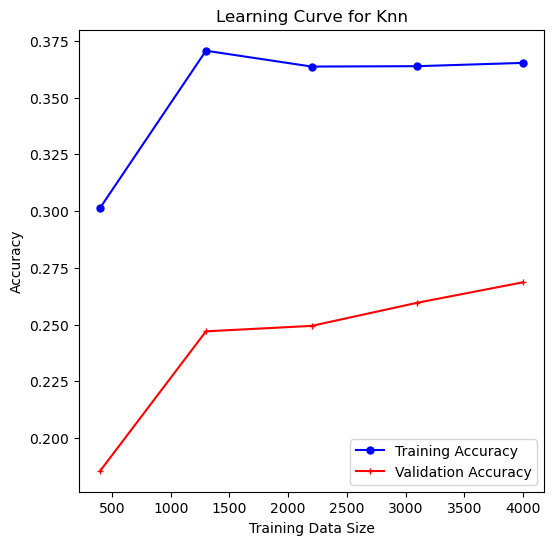

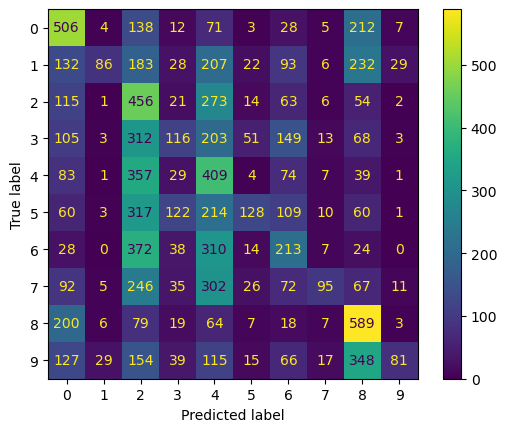

In [28]:
#KNN

fig, axes = plt.subplots(figsize=(6, 6))
knn = KNeighborsClassifier(n_neighbors=10).fit(X_tr, y_tr)
#Confusion Matrix
y_te_pred = knn.predict(X_te)
sklearn_cm = confusion_matrix(y_te, y_te_pred)
sklearn_disp = ConfusionMatrixDisplay(confusion_matrix = sklearn_cm)
sklearn_disp.plot()
# Accuracy, Precision, Recall, ROC AUC score
y_te_scores = knn.predict_proba(X_te)
print('Accuracy: %.5f' % accuracy_score(y_te, y_te_pred))
print('Precision: %.5f' % precision_score(y_te, y_te_pred,average='macro'))
print('Recall: %.5f' % recall_score(y_te, y_te_pred,average='macro'))
print('roc_auc_score: %.5f'% roc_auc_score(y_te,y_te_scores, average='macro',multi_class='ovr'))

#Learning Curve
train_sizes, train_scores, test_scores = learning_curve(estimator=knn, X=X_tr, y=y_tr,n_jobs=1)
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

axes.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
axes.plot(train_sizes, test_mean, color='red', marker='+', markersize=5, label='Validation Accuracy')
axes.set_title('Learning Curve for Knn')
axes.set_xlabel('Training Data Size')
axes.set_ylabel('Accuracy')
axes.legend(loc='lower right')



2.Logistic Regression

Accuracy: 0.28680
Precision: 0.28845
Recall: 0.28723
roc_auc_score: 0.72131


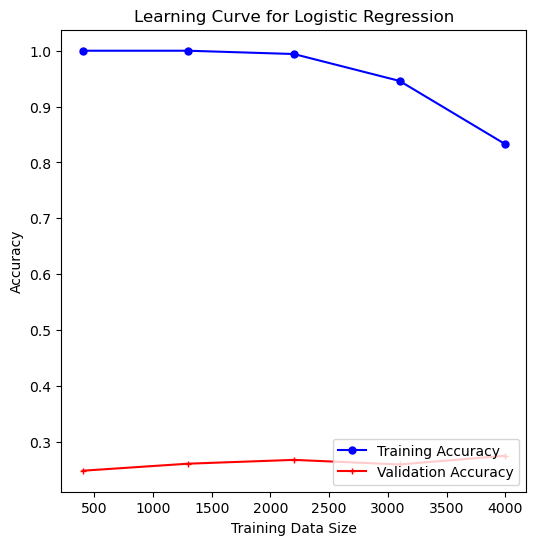

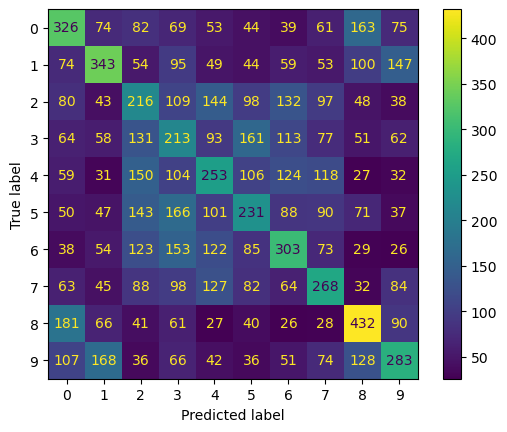

In [30]:
#Logistic Regression

fig, axes = plt.subplots(figsize=(6, 6))
lr = LogisticRegression(random_state=seed).fit(X_tr, y_tr)
#Confusion Matrix
y_te_pred = lr.predict(X_te)
sklearn_cm = confusion_matrix(y_te, y_te_pred)
sklearn_disp = ConfusionMatrixDisplay(confusion_matrix = sklearn_cm)
sklearn_disp.plot()
# Accuracy, Precision, Recall, ROC AUC score
y_te_scores = lr.predict_proba(X_te)
print('Accuracy: %.5f' % accuracy_score(y_te, y_te_pred))
print('Precision: %.5f' % precision_score(y_te, y_te_pred,average='macro'))
print('Recall: %.5f' % recall_score(y_te, y_te_pred,average='macro'))
print('roc_auc_score: %.5f'% roc_auc_score(y_te,y_te_scores, average='macro',multi_class='ovr'))

#Learning Curve
train_sizes, train_scores, test_scores = learning_curve(estimator=lr, X=X_tr, y=y_tr,n_jobs=1)
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

axes.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
axes.plot(train_sizes, test_mean, color='red', marker='+', markersize=5, label='Validation Accuracy')
axes.set_title('Learning Curve for Logistic Regression')
axes.set_xlabel('Training Data Size')
axes.set_ylabel('Accuracy')
axes.legend(loc='lower right')



3.clf Neural Network

Accuracy: 0.37240
Precision: 0.37672
Recall: 0.37321
roc_auc_score: 0.79068


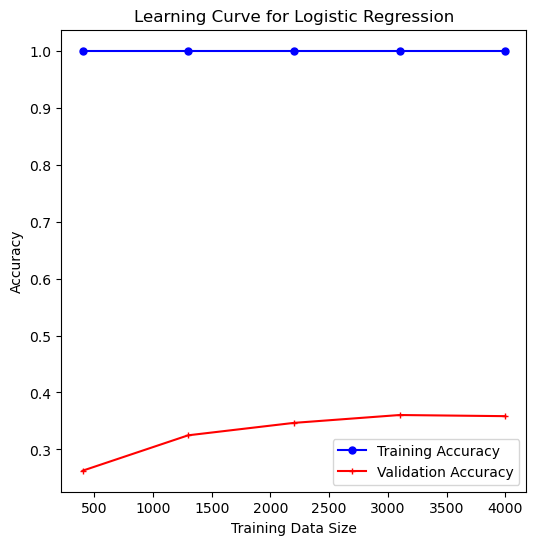

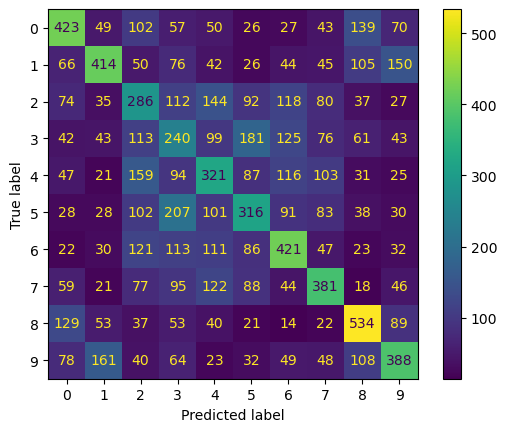

In [32]:
#clf Neural Network

fig, axes = plt.subplots(figsize=(6, 6))
clf = MLPClassifier(hidden_layer_sizes=(64,),activation = 'relu',n_iter_no_change=100,
                    solver='sgd',max_iter=100, learning_rate_init = 0.01, batch_size=256,random_state=seed).fit(X_tr, y_tr)
#Confusion Matrix
y_te_pred = clf.predict(X_te)
sklearn_cm = confusion_matrix(y_te, y_te_pred)
sklearn_disp = ConfusionMatrixDisplay(confusion_matrix = sklearn_cm)
sklearn_disp.plot()
# Accuracy, Precision, Recall, ROC AUC score
y_te_scores = clf.predict_proba(X_te)
print('Accuracy: %.5f' % accuracy_score(y_te, y_te_pred))
print('Precision: %.5f' % precision_score(y_te, y_te_pred,average='macro'))
print('Recall: %.5f' % recall_score(y_te, y_te_pred,average='macro'))
print('roc_auc_score: %.5f'% roc_auc_score(y_te,y_te_scores, average='macro',multi_class='ovr'))

#Learning Curve
train_sizes, train_scores, test_scores = learning_curve(estimator=clf, X=X_tr, y=y_tr,n_jobs=1)
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

axes.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
axes.plot(train_sizes, test_mean, color='red', marker='+', markersize=5, label='Validation Accuracy')
axes.set_title('Learning Curve for Logistic Regression')
axes.set_xlabel('Training Data Size')
axes.set_ylabel('Accuracy')
axes.legend(loc='lower right')


4.Decision tree

Accuracy: 0.22840
Precision: 0.18687
Recall: 0.22919
roc_auc_score: 0.66555


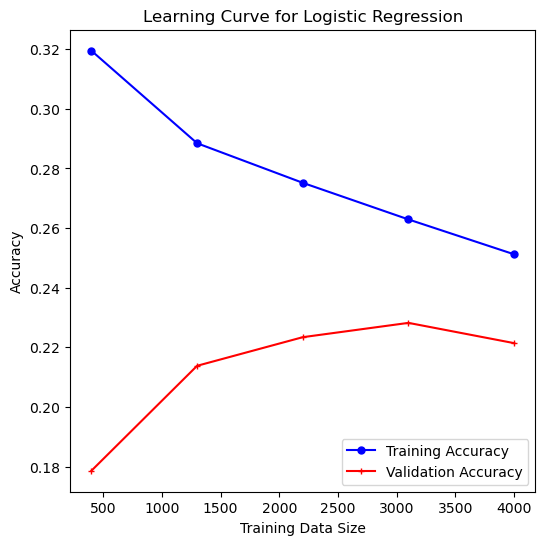

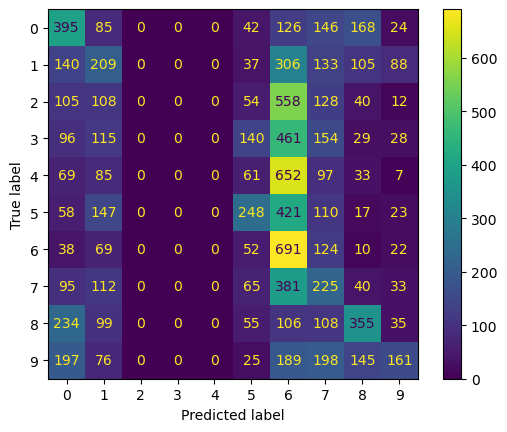

In [33]:
#Decision tree

fig, axes = plt.subplots(figsize=(6, 6))
dtc = DecisionTreeClassifier(max_depth = 3,random_state=seed).fit(X_tr, y_tr)
#Confusion Matrix
y_te_pred = dtc.predict(X_te)
sklearn_cm = confusion_matrix(y_te, y_te_pred)
sklearn_disp = ConfusionMatrixDisplay(confusion_matrix = sklearn_cm)
sklearn_disp.plot()
# Accuracy, Precision, Recall, ROC AUC score
y_te_scores = dtc.predict_proba(X_te)
print('Accuracy: %.5f' % accuracy_score(y_te, y_te_pred))
print('Precision: %.5f' % precision_score(y_te, y_te_pred,average='macro'))
print('Recall: %.5f' % recall_score(y_te, y_te_pred,average='macro'))
print('roc_auc_score: %.5f'% roc_auc_score(y_te,y_te_scores, average='macro',multi_class='ovr'))

#Learning Curve
train_sizes, train_scores, test_scores = learning_curve(estimator=dtc, X=X_tr, y=y_tr,n_jobs=1)
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

axes.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
axes.plot(train_sizes, test_mean, color='red', marker='+', markersize=5, label='Validation Accuracy')
axes.set_title('Learning Curve for Logistic Regression')
axes.set_xlabel('Training Data Size')
axes.set_ylabel('Accuracy')
axes.legend(loc='lower right')


Text(0, 0.5, 'Accuracy')

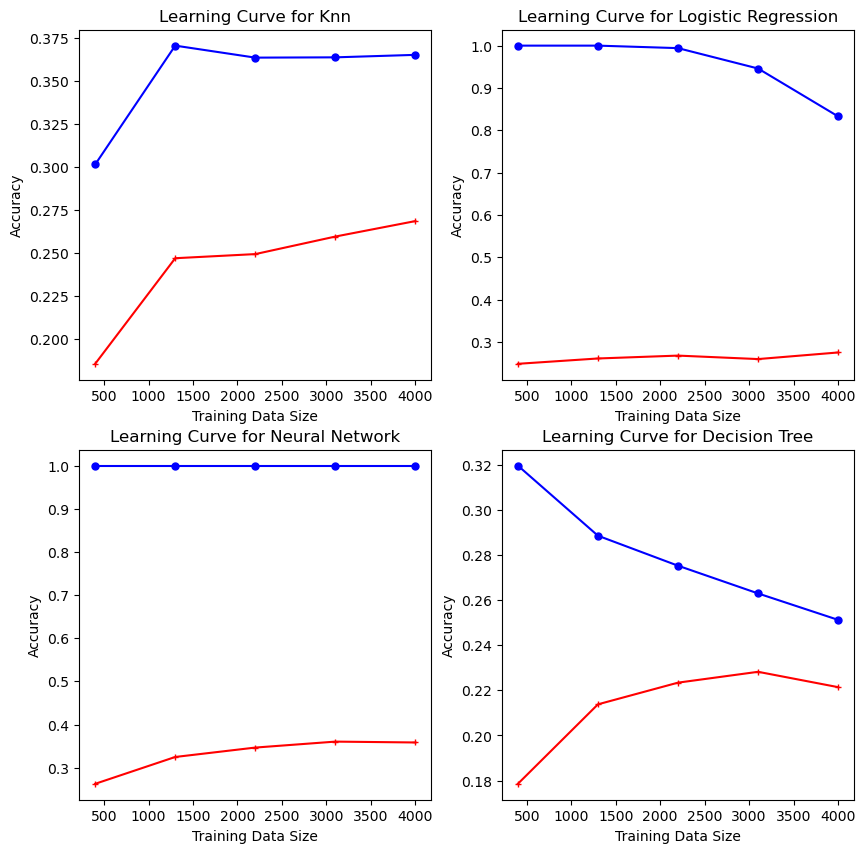

In [9]:


fig, axes = plt.subplots(2, 2, figsize=(10, 10))
knn = KNeighborsClassifier(n_neighbors=10)
                           
lr = LogisticRegression(random_state=seed)
                           
clf = MLPClassifier(hidden_layer_sizes=(64,),activation = 'relu',n_iter_no_change=100,
                    solver='sgd',max_iter=100, learning_rate_init = 0.01, batch_size=256,random_state=seed)
                           
dtc = DecisionTreeClassifier(max_depth = 3,random_state=seed)

#Learning curve for knn
train_sizes, train_scores, test_scores = learning_curve(estimator=knn, X=X_tr, y=y_tr,n_jobs=1)
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

axes[0,0].plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
axes[0,0].plot(train_sizes, test_mean, color='red', marker='+', markersize=5, label='Validation Accuracy')
axes[0,0].set_title('Learning Curve for Knn')
axes[0,0].set_xlabel('Training Data Size')
axes[0,0].set_ylabel('Accuracy')

#Learning curve for lr
train_sizes, train_scores, test_scores = learning_curve(estimator=lr, X=X_tr, y=y_tr,n_jobs=1)
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

axes[0,1].plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
axes[0,1].plot(train_sizes, test_mean, color='red', marker='+', markersize=5, label='Validation Accuracy')
axes[0,1].set_title('Learning Curve for Logistic Regression')
axes[0,1].set_xlabel('Training Data Size')
axes[0,1].set_ylabel('Accuracy')

#Learning curve for clf
train_sizes, train_scores, test_scores = learning_curve(estimator=clf, X=X_tr, y=y_tr,n_jobs=1)
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

axes[1,0].plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
axes[1,0].plot(train_sizes, test_mean, color='red', marker='+', markersize=5, label='Validation Accuracy')
axes[1,0].set_title('Learning Curve for Neural Network')
axes[1,0].set_xlabel('Training Data Size')
axes[1,0].set_ylabel('Accuracy')

#Learning curve for decision tree
train_sizes, train_scores, test_scores = learning_curve(estimator=dtc, X=X_tr, y=y_tr,n_jobs=1)
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

axes[1,1].plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
axes[1,1].plot(train_sizes, test_mean, color='red', marker='+', markersize=5, label='Validation Accuracy')
axes[1,1].set_title('Learning Curve for Decision Tree')
axes[1,1].set_xlabel('Training Data Size')
axes[1,1].set_ylabel('Accuracy')